In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline


### Importing data


In [16]:
df = pd.read_csv("oron_suuts.csv")
df.head()


,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84000000.0,"УБ — Хан-Уул, Viva city",Паркет,Тагтгүй,2013,Байхгүй,Вакум,5,Бүргэд,30.5 м²,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115000000.0,"УБ — Хан-Уул, 19-р хороолол",Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,16.0 м²,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510000000.0,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1 тагттай,2010,Байхгүй,Вакум,10,Бүргэд,150.0 м²,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,2700000.0,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,Тагтгүй,2021,Байхгүй,Вакум,12,Вакум,39.98 м²,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,4500000.0,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2 тагттай,2016,Байгаа,Вакум,16,Бүргэд,115.86 м²,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [17]:
df.dtypes

үнэ                       float64
хаяг                       object
Шал:                       object
Тагт:                      object
Ашиглалтанд орсон он:       int64
Гараж:                     object
Цонх:                      object
Барилгын давхар:            int64
Хаалга:                    object
Талбай:                    object
Хэдэн давхарт:              int64
Лизингээр авах боломж:     object
Цонхны тоо:                 int64
Барилгын явц:              object
Байршил:                   object
Код:                      float64
location:                  object
dtype: object

In [18]:
df.isnull().sum()

үнэ                          0
хаяг                         0
Шал:                         0
Тагт:                        0
Ашиглалтанд орсон он:        0
Гараж:                       0
Цонх:                        0
Барилгын давхар:             0
Хаалга:                      0
Талбай:                      0
Хэдэн давхарт:               0
Лизингээр авах боломж:       0
Цонхны тоо:                  0
Барилгын явц:                0
Байршил:                  5999
Код:                      5999
location:                 5999
dtype: int64

In [19]:
# determine which features are categorical
df.dtypes[df.dtypes == 'object']

хаяг                      object
Шал:                      object
Тагт:                     object
Гараж:                    object
Цонх:                     object
Хаалга:                   object
Талбай:                   object
Лизингээр авах боломж:    object
Барилгын явц:             object
Байршил:                  object
location:                 object
dtype: object

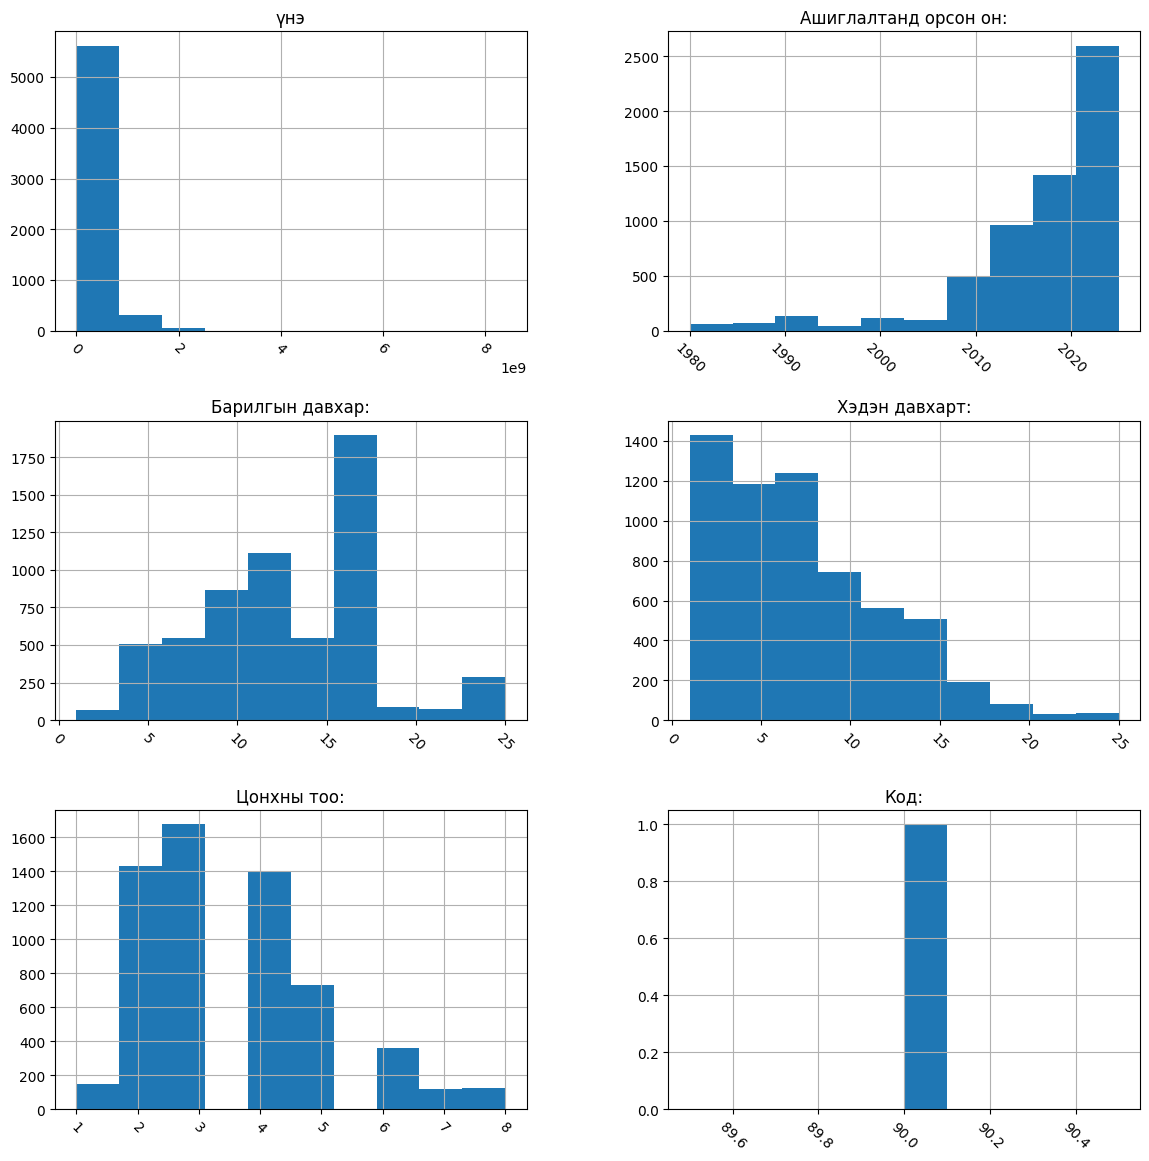

In [20]:
# plot histogram 
df.hist(figsize=(14, 14), xrot=-45)
# clear the text "residue"
plt.show()

In [21]:
# display summary statistics, such as mean, std, and quartiles
df.describe()

,үнэ,Ашиглалтанд орсон он:,Барилгын давхар:,Хэдэн давхарт:,Цонхны тоо:,Код:
count,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,1.0
mean,3.008563e+08,2016.662667,12.668333,7.284167,3.556333,90.0
std,3.564648e+08,8.844240,4.819737,4.639972,1.467033,NaN
min,4.000000e+02,1980.000000,1.000000,1.000000,1.000000,90.0
25%,1.150000e+08,2014.000000,9.000000,4.000000,2.000000,90.0
50%,1.980000e+08,2019.000000,12.000000,6.000000,3.000000,90.0
75%,3.750000e+08,2023.000000,16.000000,10.000000,4.000000,90.0
max,8.400000e+09,2025.000000,25.000000,25.000000,8.000000,90.0


In [22]:
# filter our observations by object type to provide descriptions
df.describe(include=['object'])

,хаяг,Шал:,Тагт:,Гараж:,Цонх:,Хаалга:,Талбай:,Лизингээр авах боломж:,Барилгын явц:,Байршил:,location:
count,6000,6000,6000,6000,6000,6000,6000,6000,6000,1,1
unique,268,6,4,2,4,5,1639,3,2,1,1
top,"УБ — Хан-Уул, Яармаг",Паркет,1 тагттай,Байхгүй,Вакум,Бүргэд,70.0 м²,Лизинггүй,Ашиглалтад орсон,Зайсан,Баянзүрх
freq,534,5786,4601,4622,5745,4278,88,4214,5526,1,1


<Axes: xlabel='count', ylabel='Барилгын явц:'>

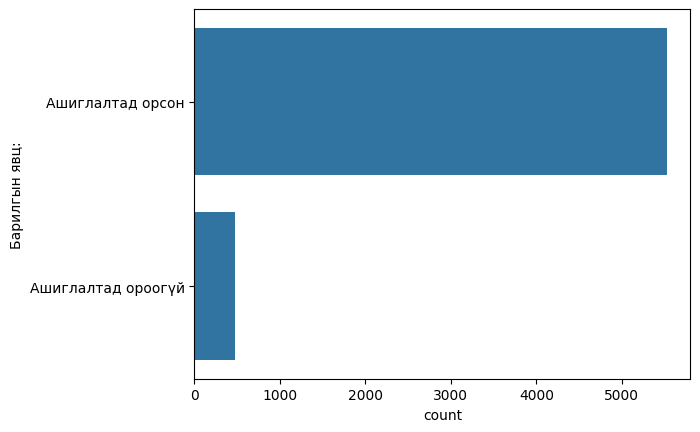

In [23]:
# display a barplot with the count for y variables
sns.countplot(y='Барилгын явц:', data=df)

<Axes: xlabel='count', ylabel='Тагт:'>

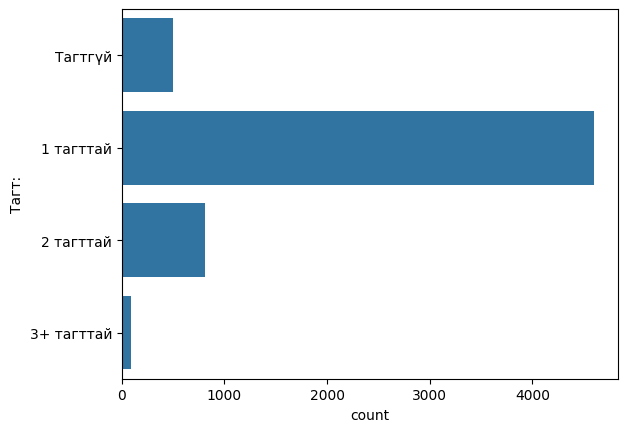

In [24]:
# display a barplot with the count for y variables
sns.countplot(y='Тагт:', data=df)

<Axes: xlabel='count', ylabel='Шал:'>

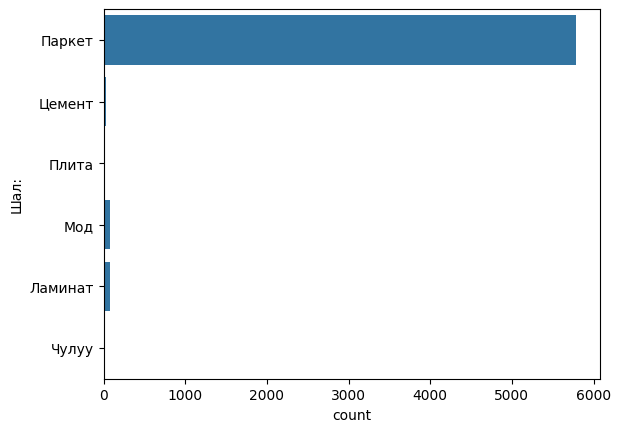

In [25]:
# display a barplot with the count for y variables
sns.countplot(y='Шал:', data=df)

<Axes: xlabel='count', ylabel='Хаалга:'>

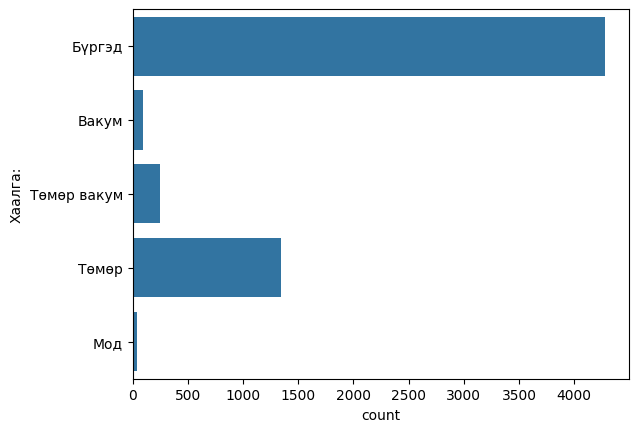

In [26]:
# display a barplot with the count for y variables
sns.countplot(y='Хаалга:', data=df)